# Image Processing Test Case V3.0

## Code by: Joshua Collins, Group 1 - RSEP

In this image processing test-case the microstructural grains in an image will be segmented using the 'skikit-image' processing package and then meshed to prepare them for finite element modelling.

The image to be processed is a brightfield image of a Ti6Al4V alloy, at x20 magnification, and was provided by Dr Pratheek Shantraj.

### 1. Importing Packages

In [1]:
import skimage
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage import exposure
from skimage.filters import sobel
from skimage.morphology import watershed
from scipy import ndimage as ndi
from skimage import measure

import os
import numpy as np
import matplotlib.pyplot as plt

### 2. Reading the Image

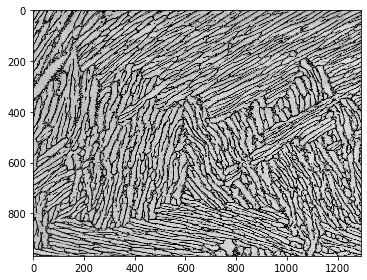

In [2]:
grains = io.imread('Ti64_V1.0.jpg')
io.imshow(grains)
io.show()

In [3]:
print('The image type is:', grains.dtype, ', and its shape is:', grains.shape)

The image type is: uint8 , and its shape is: (968, 1292, 3)


### 3. Manipulating the Image

In [4]:
grayscale = rgb2gray(grains)
grayscale.shape

(968, 1292)

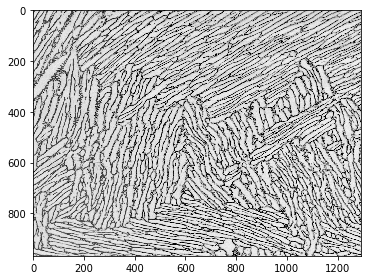

In [5]:
image = exposure.adjust_gamma(grayscale,0.5)
io.imshow(image)

### 4. Segmenting the Image

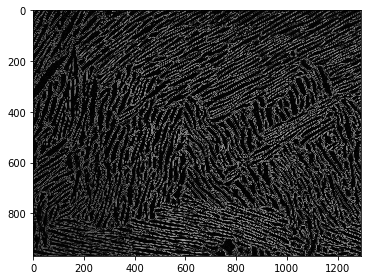

In [6]:
elevation_map = sobel(image)
io.imshow(elevation_map)

In [7]:
image

array([[0.88339807, 0.92035799, 0.91394426, ..., 0.92460909, 0.90315352,
        0.88561489],
       [0.89003194, 0.87447463, 0.90097986, ..., 0.84482276, 0.837831  ,
        0.82841687],
       [0.84714052, 0.80683356, 0.84714052, ..., 0.87894768, 0.86319062,
        0.83313723],
       ...,
       [0.82128546, 0.80195839, 0.80926013, ..., 0.80439967, 0.81889452,
        0.85634884],
       [0.91608716, 0.87671401, 0.85863549, ..., 0.86319062, 0.87671401,
        0.92035799],
       [0.90097986, 0.84249862, 0.81409158, ..., 0.85863549, 0.86772183,
        0.90748521]])

C:\Users\Joosh\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


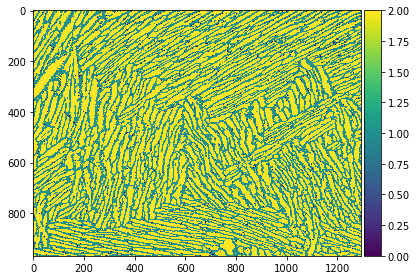

In [8]:
markers = np.zeros_like(image)
markers[image < 0.79 ] = 1
markers[image > 0.8 ] = 2

io.imshow(markers)

C:\Users\Joosh\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


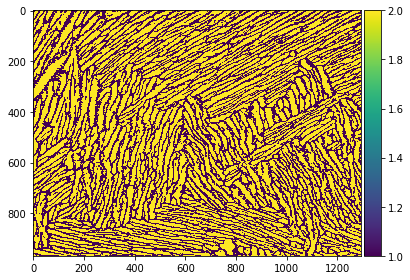

In [9]:
segmentation = watershed(elevation_map, markers)
io.imshow(segmentation)

### 5. Save the Binarised, Segmented Image

In [10]:
io.imsave('Ti64_binary_V1.1.png', segmentation)

C:\Users\Joosh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Ti64_binary_V1.1.png is a low contrast image
  """Entry point for launching an IPython kernel.
Lossy conversion from int32 to uint8. Range [1, 2]. Convert image to uint8 prior to saving to suppress this warning.
